# The cutoff point

In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's process.extract() function by finding the similarity score of the most distant typo of each category.



* Import process from thefuzz.
* Store the unique cuisine_types into unique_types.
* Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.


In [1]:
# Data Generation

import pandas as pd
import random

# Define the base cuisine types and some common typos for each
cuisine_types = {
    "italian": ["italian", "itallian", "italiaan", "itlian", "itailian"],
    "american": ["american", "amrican", "americn", "amerian", "amreican"],
    "asian": ["asian", "asain", "aasian", "asiann", "aasain"]
}

# Create a function to generate random restaurant names and cuisine types
def generate_restaurant_data(num_rows=1000):
    data = []
    for i in range(num_rows):
        # Generate a random restaurant name
        restaurant_name = f"Restaurant_{random.randint(1, 500)}_{random.choice(['Cafe', 'Bistro', 'Grill', 'Diner'])}"
        # Randomly pick a cuisine type and a typo from its list
        cuisine_base = random.choice(list(cuisine_types.keys()))
        cuisine_type = random.choice(cuisine_types[cuisine_base])
        # Append the record to the dataset
        data.append({"restaurant_name": restaurant_name, "cuisine_type": cuisine_type})
    return pd.DataFrame(data)

# Generate the dataset
restaurants = generate_restaurant_data(1000)

# Save the dataset to a CSV file (optional)
restaurants.to_csv("restaurants_dataset.csv", index=False)

# Display a sample of the dataset
restaurants.head()


,restaurant_name,cuisine_type
0,Restaurant_255_Bistro,itallian
1,Restaurant_209_Cafe,american
2,Restaurant_484_Diner,aasian
3,Restaurant_309_Diner,amrican
4,Restaurant_490_Diner,american


In [2]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.0 MB/s eta 0:00:0000:0100:01


In [3]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('aasian', 91), ('asiann', 91), ('asain', 80), ('aasain', 73), ('itallian', 68), ('itailian', 68), ('italiaan', 68), ('amrican', 67), ('italian', 67), ('amerian', 67), ('american', 62), ('amreican', 62), ('itlian', 55), ('americn', 50)]
[('american', 100), ('amrican', 93), ('americn', 93), ('amerian', 93), ('amreican', 88), ('asian', 62), ('aasian', 57), ('asiann', 57), ('italian', 53), ('asain', 51), ('itallian', 50), ('itailian', 50), ('italiaan', 50), ('aasain', 43), ('itlian', 43)]
[('italian', 100), ('itallian', 93), ('itailian', 93), ('italiaan', 93), ('itlian', 92), ('asian', 67), ('aasian', 62), ('asiann', 62), ('amrican', 57), ('amerian', 57), ('american', 53), ('amreican', 53), ('asain', 50), ('aasain', 46), ('americn', 43)]


# Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types ('italian', 'asian', and 'american').


* Return all of the unique values in the cuisine_type column of restaurants.
* Okay! Looks like you will need to use some string matching to correct these misspellings!

* As a first step, create a list of all possible matches, comparing 'italian' with the restaurant types listed in the cuisine_type column.

* Now you're getting somewhere! Now you can iterate through matches to reassign similar entries.

* Within the for loop, use an if statement to check whether the similarity score in each match is greater than or equal to 80.
* If it is, use .loc to select rows where cuisine_type in restaurants is equal to the current match (which is the first element of match), and reassign them to be 'italian'.

* Finally, you'll adapt your code to work with every restaurant type in categories.

* Using the variable cuisine to iterate through categories, embed your code from the previous step in an outer for loop.
* Inspect the final result. This has been done for you.






In [4]:
# Inspect the unique values of the cuisine_type column
print(restaurants['cuisine_type'].unique())

['itallian' 'american' 'aasian' 'amrican' 'aasain' 'italian' 'asain'
 'amreican' 'asiann' 'asian' 'itailian' 'itlian' 'italiaan' 'americn'
 'amerian']


In [5]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))
# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 7), ('italian', 100, 15), ('italian', 100, 36), ('italian', 100, 37), ('italian', 100, 46)]


In [6]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
     restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = 'italian'

In [7]:
categories = ['american' 'asian' 'italian']

# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

['americanasianitalian' 'aasian' 'amrican' 'aasain' 'asain' 'amreican'
 'asiann' 'amerian']


# Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.


* Instantiate an indexing object by using the Index() function from recordlinkage.
* Block your pairing on cuisine_type by using indexer's' .block() method.
* Generate pairs by indexing restaurants and restaurants_new in that order.

In [9]:
!pip install recordlinkage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.9/926.9 kB 12.3 MB/s eta 0:00:0000:010:01


In [ ]:
# Data Generation

import pandas as pd
import random

# Define the base cuisine types and some common typos for each
cuisine_types = {
    "italian": ["italian", "itallian", "italiaan", "itlian", "itailian"],
    "american": ["american", "amrican", "americn", "amerian", "amreican"],
    "asian": ["asian", "asain", "aasian", "asiann", "aasain"]
}

# Create a reverse mapping for normalizing cuisine types
typo_to_base = {typo: base for base, typos in cuisine_types.items() for typo in typos}

# Create a function to generate random restaurant names and cuisine types
def generate_restaurant_data(num_rows=1000):
    data = []
    for i in range(num_rows):
        # Generate a random restaurant name
        restaurant_name = f"Restaurant_{random.randint(1, 500)}_{random.choice(['Cafe', 'Bistro', 'Grill', 'Diner'])}"
        # Randomly pick a cuisine type and a typo from its list
        cuisine_base = random.choice(list(cuisine_types.keys()))
        cuisine_type = random.choice(cuisine_types[cuisine_base])
        # Append the record to the dataset
        data.append({"restaurant_name": restaurant_name, "cuisine_type": cuisine_type})
    return pd.DataFrame(data)

# Generate the original dataset
restaurants = generate_restaurant_data(1000)

# Create a new dataset with some variations and typos for restaurants_new
def generate_new_restaurant_data(base_data, num_rows=500):
    data = []
    for i in range(num_rows):
        # Randomly select a restaurant from the base data
        base_row = base_data.sample(n=1).iloc[0]
        # Introduce variations in the name and cuisine_type
        restaurant_name = base_row["restaurant_name"].replace("Restaurant", "Resto") + f"_{random.choice(['Place', 'Spot', 'Corner'])}"
        # Normalize cuisine type to its base form
        normalized_cuisine = typo_to_base.get(base_row["cuisine_type"].lower(), base_row["cuisine_type"].lower())
        cuisine_type = random.choice(cuisine_types[normalized_cuisine])
        # Append the record to the new dataset
        data.append({"restaurant_name": restaurant_name, "cuisine_type": cuisine_type})
    return pd.DataFrame(data)

restaurants_new = generate_new_restaurant_data(restaurants, 500)

# Save both datasets to CSV files (optional)
restaurants.to_csv("restaurants_dataset.csv", index=False)
restaurants_new.to_csv("restaurants_new_dataset.csv", index=False)

# Display a sample of the new dataset
restaurants_new.head()


In [ ]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block("cuisine_type")

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

**Similar restaurants**

In the last exercise, you generated pairs between restaurants and restaurants_new in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and cuisine_type columns between each pair, and similar strings for each pair in the rest_name column. Both DataFrames, pandas and recordlinkage are in your environment.

* Instantiate a comparison object using the recordlinkage.Compare() function.
* Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
* Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.
* Compute the comparison of the pairs by using the .compute() method of comp_cl.


In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants,restaurants_new)
print(potential_matches)

# Linking them together!
In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.


* Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
* Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
* Subset restaurants_new for rows that are not in matching_indices.
Append non_dup to restaurants.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >=  3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

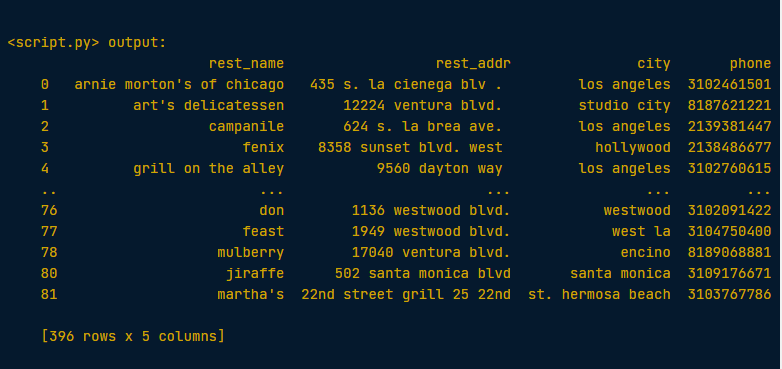